# Classifying movie reviews:
a binary classification example
The IMDB dataset

In [ ]:
FOR EXAMPLE
review: Fantastic
Number Name: 55
One hot encode:
    vocabulary is of 10 words
    0 0 0 0 0 0 0 0 0 0
    0 0 0 0 0 0 0 0 0 0
    0 1 0 0 0 0 0 0 0 0   ----> 55
    if word "bad" comes in review
    0 0 0 0 0 0 0 0 0 0
    0 0 0 0 0 0 0 0 0 0
    0 1 0 0 0 0 0 0 0 0
    0 0 0 0 0 0 0 1 0 0 ---->bad
    
The vector containing all reviews all vector will make one hot encode each word. 
size of sequence=10000


In [4]:
import tensorflow

In [5]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
#restricting to top 9999 most frequent words
#assigning an int number to each word
#then convert int to make it understandable for system
#for example word "Dataset" in a collection of 200 words has an integer label 9
#if we one hot encode this, vector size will be 200 for each word
#in our case vector size would be 10000
#no need to one hot encode in binary case

In [6]:
train_data[0]
#every word has a int value

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [7]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [10]:
import numpy as np

In [11]:
def vectorize_sequences(sequences, dimension=10000):  #sequence represents all reviews.
    results = np.zeros((len(sequences), dimension))   #(25000,10000)    #manual one hot encoding ONE WORD then repeat this on 25000 reviews 
    for i, sequence in enumerate(sequences):              #one hot encode EVERY WORD
        results[i, sequence] = 1.         
    return results
x_train = vectorize_sequences(train_data)    #train and test data converted to 0s and 1s
x_test = vectorize_sequences(test_data)

In [12]:
 x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [17]:
from tensorflow.keras import models          #changes made here to improve accuracy
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [19]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

In [20]:
#validation
#to not expose test data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 398us/sample - loss: 0.5036 - accuracy: 0.7949 - val_loss: 0.4113 - val_accuracy: 0.8303
Epoch 2/20
15000/15000 [==============================] - 2s 158us/sample - loss: 0.2994 - accuracy: 0.9054 - val_loss: 0.3039 - val_accuracy: 0.8854
Epoch 3/20
15000/15000 [==============================] - 2s 143us/sample - loss: 0.2204 - accuracy: 0.9284 - val_loss: 0.2976 - val_accuracy: 0.8815
Epoch 4/20
15000/15000 [==============================] - 2s 127us/sample - loss: 0.1726 - accuracy: 0.9448 - val_loss: 0.2891 - val_accuracy: 0.8840
Epoch 5/20
15000/15000 [==============================] - 2s 135us/sample - loss: 0.1422 - accuracy: 0.9547 - val_loss: 0.2817 - val_accuracy: 0.8873
Epoch 6/20
15000/15000 [==============================] - 2s 141us/sample - loss: 0.1191 - accuracy: 0.9607 - val_loss: 0.2964 - val_accuracy: 0.8849
Epoch 7/20
15000/15000 [==========================

In [22]:
#2 models 2 accuracies training and validation
#max trained after 5 epoch, affecting accuracy after that
history_dict = history.history

In [23]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

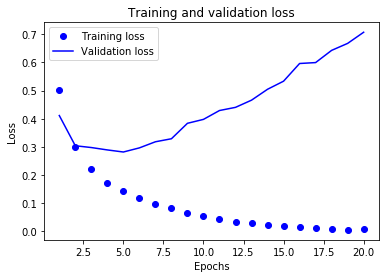

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)  #kept dynamic bc epoch changes, working on loss values or val loss values to get epoch count

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #bo for blue circle 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')     #b for blue
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()